# Example figure StreamCom
```
Sascha Bub - version 1.0 - 09.08.2021  
```

This example figure was originally drafted by Tido Strauss, gaiac. The Jupyter notebook presented here shows, how the figure can be generated from Landscape Model runs.

Here, the original description of the figure:
> The model-internal Monte-Carlo simulations are averaged to one value. The number of "external" Monte-Carlo simulations is displayed as the mean value with deviation. 
> (Note: If STREAMcom-internal Monte-Carlo simulations should also be displayed, the same figure type can be used).
Figures are created for each simulated taxon. The abundance (sum of all animals in the entire river segment) is displayed.
>
> Suggestion:
> 1. linear y-axis with absolute abundances over time
> 2. log-scaled y-axis with treatments over time normalized to the mean value of the controls



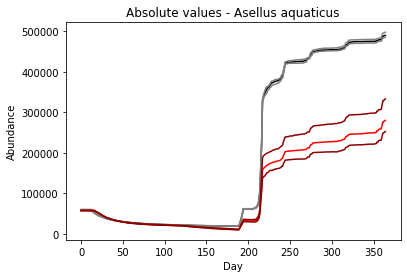

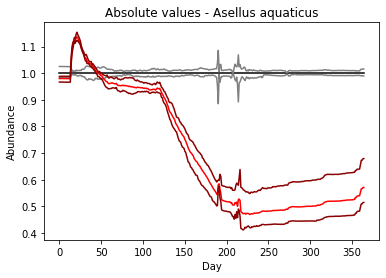

In [1]:
import stores
import numpy
import matplotlib.pyplot

# Load population of three control runs and average internal StreamCom runs
store = stores.X3dfStore("sample/stream_com/control/MC1", mode="r")
pop_control = store.get_values("StreamCom2_CascadeToxswa/population_output_Asellus aquaticus").mean(1)
store = stores.X3dfStore("sample/stream_com/control/MC2", mode="r")
pop_control = numpy.c_[pop_control, store.get_values("StreamCom2_CascadeToxswa/population_output_Asellus aquaticus").mean(1)]
store = stores.X3dfStore("sample/stream_com/control/MC3", mode="r")
pop_control = numpy.c_[pop_control, store.get_values("StreamCom2_CascadeToxswa/population_output_Asellus aquaticus").mean(1)]

# Load population of three runs with treatments and average internal StreamCom runs
store = stores.X3dfStore("sample/stream_com/treatment/MC1", mode="r")
pop_treatment = store.get_values("StreamCom2_CascadeToxswa/population_output_exposure_Asellus aquaticus").mean(1)
store = stores.X3dfStore("sample/stream_com/treatment/MC2", mode="r")
pop_treatment = numpy.c_[pop_treatment, store.get_values("StreamCom2_CascadeToxswa/population_output_exposure_Asellus aquaticus").mean(1)]
store = stores.X3dfStore("sample/stream_com/treatment/MC3", mode="r")
pop_treatment = numpy.c_[pop_treatment, store.get_values("StreamCom2_CascadeToxswa/population_output_exposure_Asellus aquaticus").mean(1)]

# Plot the data in absoulte terms
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(title="Absolute values - Asellus aquaticus", xlabel="Day", ylabel="Abundance")
ax.plot(pop_control.mean(1), color="black")
ax.plot(pop_control.min(1), color="grey")
ax.plot(pop_control.max(1), color="grey")
ax.plot(pop_treatment.mean(1), color="red")
ax.plot(pop_treatment.min(1), color="darkred")
ax.plot(pop_treatment.max(1), color="darkred")
matplotlib.pyplot.show()

# Plot the data in relative
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(title="Absolute values - Asellus aquaticus", xlabel="Day", ylabel="Abundance")
ax.plot(pop_control.mean(1) / pop_control.mean(1), color="black")
ax.plot(pop_control.min(1) / pop_control.mean(1), color="grey")
ax.plot(pop_control.max(1) / pop_control.mean(1), color="grey")
ax.plot(pop_treatment.mean(1) / pop_control.mean(1), color="red")
ax.plot(pop_treatment.min(1) / pop_control.mean(1), color="darkred")
ax.plot(pop_treatment.max(1) / pop_control.mean(1), color="darkred")
matplotlib.pyplot.show()

> **Black**: Mean value (bold) and 5% / 95% percentile of the control runs (if ≤ 20 Monte Carlo simulations, then minimum and maximum values per day)  
> **Red**: Mean value (bold) and 5% / 95% percentile of treatments (if ≤ 20 Monte Carlo simulations, then minimum and maximum values per day)
>
> The area between the percentiles can also be colored grey (controls) or light red (treatments).  
> The figures are also conceivable for controls and treatments separately.
